# Selenium Kalibrr Job Scraping

## Table of Contents: 
- [Introduction](#introduction) 
- [Background](#background)
- [Environment and Library Setup](#environment)
- [Web Scraping Setup & Data Extraction](#webscraping)
- [Data Cleaning & Preprocessing](#datacelaning)
- [Exploratory Data Analysis](#eda)
- [Conclusion](#conclusion)
- [References](#references)

<a id='introduction'></a>
## Introduction 

With the fast advancement of the technology introduced, there are many available tools that can helped us in doing our work such as web scraping has helped data scientists and analysts in obtaining public information. As business or even anyone can leverage their operations with the introduction of more advanced techonology, data and information has never been more free and will become more crucial in gaining advantage. In this notebook, we will provide a web scraping on Kalibrr job posting site as the example of how we can look and gain insights at the current data for data-related job market, industries and more.  

<a id='background'></a>
## Background 
Kalibrr is a job posting platform that connects businesses with talented professionals. With its vast array of job listings, Kalibrr offers a unique opportunity to understand trends in the job market and the ever-evolving demands of various industries. 

There are a lot of ways to do a webscraping, and this notebook used two popular methods: using **BeautifulSoup** and **Selenium**. While **BeautifulSoup** allows for simple parsing of HTML and XML documents, **Selenium** provides the capability to automate web browser, which can be especially useful for sites that rely on JavaScript or dynamic contents.

After extracting the data, we will create a visualizations based on it in order for interpretations. This notebook will create plots to represent the extracted data and showcase how to use flask to make these plots appeared on your web browsers which will allowed you to gains insights on Kalibrr job postings based on their post durations, locations and roles. 

Let's go! 

<a id='environment'></a>
## Environment and Library Setup 
These are the necessary steps to prepare the necessary environment and library setup: 
1. setting up a virtual environment (optional but recommended) 
2. installing libraries using requirements.txt that are provided 
3. importing the necessary libraries like below

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager #used for chrome so that selenium can automate it
from datetime import datetime, timedelta
import re
import time #for giving pauses between each page to allow loading
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 
import numpy as np #used for annotations
import requests

<a id='webscraping'></a>
## Web Scraping Setup & Data Extraction
In order for us to perform the web scraping successfully, we need to identify the needed informations first in Kalibrr such as: 
1. Job title such as data analyst, supervisor 
2. Job description that explains what will they do 
3. Company's name 
4. The location of the vacancy 
5. Posting date and expiry date so we can get the duration of the job postings

Below we will get an example of acquiring informations with **BeautifulSoup** web scraping of job titleand by knowing the HTML key for the infromations

In [3]:
url_get = requests.get('https://www.kalibrr.id/job-board/te/data/1')
soup = BeautifulSoup(url_get.content,"html.parser")
table = soup.find('h2', attrs={'class':'k-text-xl k-font-medium'})
print(table.prettify()[:500])

<h2 class="k-text-xl k-font-medium">
 <a class="k-text-primary-color" href="/c/pt-berlian-sistem-informasi/jobs/204136/data-analyst-2" itemprop="name">
  Data Analyst
 </a>
</h2>



After knowing all of the HTML keys, we will use both BeautifulSoup and Selenium to navigate the HTML structure and extracting the needed information.
### BeautifulSoup and Selenium
**BeautifulSoup** is a library that can quickly find and extract any specific chapter, paragraph or information that you needed while **Selenium** is like a remote control for web browsers where it can be instructed to do any instructions automatically.By combining both, we use **Selenium** to drive the browser, load web pages, click buttons, and fetch dynamic content. Once all the contents are loaded, **BeautifulSoup** helps us pick out the exact pieces of information we want from it quickly. In Kalibrr site, the job description is shortened or tuncated, hence, why we used selenium to click the job posting and extract it correctly 

We also used webdriver_manager in order download the right driver version for our Chrome browser (ChromeDriverManager), and cache it for future use automatically so that our Selenium can automate our web browsers correctly. By utilizing, all of these 3, we will extract all of the needed information from Kalibrr job posting from the 1st page until the last page

In [4]:
# Selenium and BeautifulSoup for scrapping until you cannot click the next page button
# Initializing Chrome Driver Manager
chrome_options = Options()
s = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=s, options=chrome_options)

url = "https://www.kalibrr.id/job-board/te/data/1"
data = []
try:
    driver.get(url)
    
    while True:  #this loop will running until it breaks when there's no or unclickable"next" button.
        
        # Extract job data from current page
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        jobs = soup.select('div[itemscope][itemtype="http://schema.org/ListItem"]')
        for job in jobs:
            title = job.select_one('h2 a').text
            desc = job.select_one('div.k-text-xs').text.strip()
            company = job.select_one('span.k-inline-flex a').text
            location = job.find('a', class_='k-text-subdued k-block')
            location = location.get_text(strip=True) if location else None
            posting_expiry = job.select_one('div.k-text-right span.k-block').text

            data.append([title, desc, company, location, posting_expiry])
        
        # Try to click the next button
        try:
            next_button = driver.find_element(By.XPATH, "//a[@aria-label='Next page']")
            aria_disabled = next_button.get_attribute('aria-disabled')
    
            if aria_disabled == 'true':
                break  # Exit the loop if the next button is not clickable
    
            next_button.click()
            time.sleep(2)  # Give some time for the page to load

        except Exception as e:
            print(f"Error encountered: {e}")
            break

        
finally:
    driver.quit()
    
df = pd.DataFrame(data, columns=["title", "jobdesc", "company", "location", "posting and expiry"])

In [5]:
df.head()

,title,jobdesc,company,location,posting and expiry
0,Data Analyst,"Support development, enhancement, evaluate and...",PT Berlian Sistem Informasi,"East Jakarta, Indonesia",Posted 23 days ago • Apply before 30 Oct
1,Data Engineer,Liaising with coworkers and clients to elucida...,VLink Inc,"Jakarta Selatan, Indonesia",Posted 12 days ago • Apply before 25 Apr
2,IT Data Center Monitoring,Analyzing any problems related to tower/rackmo...,PGI Data,"Jakarta, Indonesia",Posted 13 days ago • Apply before 30 Oct
3,Full Stack Developer (ReactJS & Golang),"Design, develop, test, release and improve ser...",PGI Data,"Jakarta, Indonesia",Posted 4 days ago • Apply before 20 Sep
4,Data Engineer,"Design, develop & maintaining business intelli...",Magna Solusi Indonesia,"Jakarta Selatan, Indonesia",Posted 10 days ago • Apply before 31 Oct


<a id='data cleaning'></a>
## Data Cleaning & Preprocessing 
After we get the extracted data, we will try to clean the data and preprocess it into the required information with these steps: 
1. changing the datatype of date and seperate both posting and expiry date into different columns 
2. discarding expired entries which expiry date is before today's date and create a post duration column 
3. extracting data-related job postings with related keywords and create a dataframe based on it 
4. seperating location column into country and city column and make seperate dataframbe based on job postings in Indonesia 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               918 non-null    object
 1   jobdesc             918 non-null    object
 2   company             918 non-null    object
 3   location            918 non-null    object
 4   posting and expiry  918 non-null    object
dtypes: object(5)
memory usage: 36.0+ KB


In [7]:
def extract_dates(date_string):
    # Split the string into posting and expiry parts
    posting_part, expiry_part = date_string.split('•')
    
    # Extract details 
    posting_date = posting_part.strip().replace("Posted ", "").replace(" ago", "")
    expiry_date = expiry_part.strip().replace("Apply before ", "")
    
    return posting_date, expiry_date

# Test 
date_string = "Posted 21 days ago • Apply before 30 Oct"
posting, expiry = extract_dates(date_string)
print(posting)
print(expiry)

21 days
30 Oct


In [8]:
df['posting_date'], df['expiry_date'] = zip(*df['posting and expiry'].map(extract_dates))
df.drop(columns=['posting and expiry'], inplace=True)

In [9]:
df.head()

,title,jobdesc,company,location,posting_date,expiry_date
0,Data Analyst,"Support development, enhancement, evaluate and...",PT Berlian Sistem Informasi,"East Jakarta, Indonesia",23 days,30 Oct
1,Data Engineer,Liaising with coworkers and clients to elucida...,VLink Inc,"Jakarta Selatan, Indonesia",12 days,25 Apr
2,IT Data Center Monitoring,Analyzing any problems related to tower/rackmo...,PGI Data,"Jakarta, Indonesia",13 days,30 Oct
3,Full Stack Developer (ReactJS & Golang),"Design, develop, test, release and improve ser...",PGI Data,"Jakarta, Indonesia",4 days,20 Sep
4,Data Engineer,"Design, develop & maintaining business intelli...",Magna Solusi Indonesia,"Jakarta Selatan, Indonesia",10 days,31 Oct


In [10]:
# Convert 'posting_date' to datetime format
today = datetime.today()
df['posting_date'] = df['posting_date'].str.extract('(\d+)')[0].fillna(0).astype(int)
df['posting_date'] = today - pd.to_timedelta(df['posting_date'], unit='D')
df['posting_date'] = pd.to_datetime(df['posting_date'].dt.date)

# Convert 'expiry_date' to datetime format
# Assuming the year for the expiry date is the current year
df['expiry_date'] = df['expiry_date'] + ' ' + str(today.year)
df['expiry_date'] = pd.to_datetime(df['expiry_date'], format='%d %b %Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         918 non-null    object        
 1   jobdesc       918 non-null    object        
 2   company       918 non-null    object        
 3   location      918 non-null    object        
 4   posting_date  918 non-null    datetime64[ns]
 5   expiry_date   918 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 43.2+ KB


In [11]:
#subset active job posting into df active
dfa = df[df['expiry_date'] > today]

In [12]:
dfa['days_between'] = (dfa['expiry_date'] - dfa['posting_date']).dt.days.astype(int)
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 0 to 917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         794 non-null    object        
 1   jobdesc       794 non-null    object        
 2   company       794 non-null    object        
 3   location      794 non-null    object        
 4   posting_date  794 non-null    datetime64[ns]
 5   expiry_date   794 non-null    datetime64[ns]
 6   days_between  794 non-null    int32         
dtypes: datetime64[ns](2), int32(1), object(4)
memory usage: 46.5+ KB


C:\Users\Audi\AppData\Local\Temp\ipykernel_15764\701640468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['days_between'] = (dfa['expiry_date'] - dfa['posting_date']).dt.days.astype(int)


In [13]:
def duration(days):
    if days < 30:
        return "< 1 month"
    elif 30 <= days < 60:
        return "1-2 months"
    elif 60 <= days < 90:
        return "2-3 months"
    else:
        return "> 3 months"

dfa['post_period'] = dfa['days_between'].apply(duration)

C:\Users\Audi\AppData\Local\Temp\ipykernel_15764\2347732804.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['post_period'] = dfa['days_between'].apply(duration)


In [14]:
dfa['post_period'].value_counts()

post_period
1-2 months    309
< 1 month     278
> 3 months    136
2-3 months     71
Name: count, dtype: int64

We saved this value_counts() dataframe into dfg1 (based on active job posting duration) 

In [15]:
dfg1 = dfa['post_period'].value_counts().reset_index()
dfg1

,post_period,count
0,1-2 months,309
1,< 1 month,278
2,> 3 months,136
3,2-3 months,71


Now, we will moved on to second dataframe where we used regex to extract the necessary keywords that are related with data-related jobs: 
1. **Data Analyst**: anything that is related with the word 'analyst' (since from the url, we already searched in Kalibrr site with 'data' keyword) 
2. **Data Scientist**: often associated with machine learning, AI, quantitative researcher 
3. **Data Engineer**: often associated with database, big data, ETL and cloud 

And after reclassifying those job titles, we will create a subset of dataframe that only contains data-related jobs with the keywords above (df data) 

In [16]:
pattern = r'(?i)data scientist|data engineer|quantitative|machine learning\b|\bML\b|\bAI\b|analyst|database|big data|ETL|cloud'
dfd = dfa[dfa['title'].str.contains(pattern, regex=True)].copy() 

def data_title(title):
    title_lower = title.lower()

    if any(keyword in title_lower for keyword in ['data scientist', 'machine learning', 'ml', 'ai', 'quantitative']):
        return 'Data Scientist'
    elif 'analyst' in title_lower:
        return 'Data Analyst'
    elif any(keyword in title_lower for keyword in ['data engineer','database', 'big data', 'etl', 'cloud']):
        return 'Data Engineer'
    else:
        return title  # this will retain titles that don't match any of our criteria

dfd['title'] = dfd['title'].apply(data_title)

In [17]:
dfd['title'].value_counts()

title
Data Analyst      99
Data Engineer     34
Data Scientist    10
Name: count, dtype: int64

We saved this value_counts() dataframe into dfg2 (based on data-related job posting)

In [18]:
dfg2 = dfd['title'].value_counts().reset_index()
dfg2

,title,count
0,Data Analyst,99
1,Data Engineer,34
2,Data Scientist,10


After the second dataframe, we will seperate location column into city and later, country columns which we will use to get dataframe of job-posting only in Indonesian cities  

In [19]:
dfa['country'] = dfa['location'].str.split(',').str[-1].str.strip()
dfa['city'] = dfa['location'].str.split(',').str[0].str.strip()
dfa['country'].value_counts()

C:\Users\Audi\AppData\Local\Temp\ipykernel_15764\3004754259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['country'] = dfa['location'].str.split(',').str[-1].str.strip()
C:\Users\Audi\AppData\Local\Temp\ipykernel_15764\3004754259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['city'] = dfa['location'].str.split(',').str[0].str.strip()


country
Philippines      522
Indonesia        270
United States      2
Name: count, dtype: int64

In [20]:
dfi = dfa[dfa['country'] == 'Indonesia']
dfi['city'].value_counts()

city
Jakarta Selatan           46
South Jakarta             43
Tangerang                 27
Central Jakarta           25
West Jakarta              23
Jakarta Pusat             18
Jakarta                   11
Jakarta Barat             11
Central Jakarta City       6
Kota Jakarta Barat         5
Surabaya                   4
South Tangerang            4
East Jakarta               4
Jakarta Timur              4
Kota Jakarta Pusat         4
Jakarta Utara              3
Depok                      3
Yogyakarta                 2
Makassar                   2
Tangerang Kabupaten        2
Badung                     2
Mataram                    2
Banyuwangi                 2
Bandung                    2
North Jakarta              2
South Jakarta City         1
Bandung Kota               1
Sleman                     1
Balikpapan                 1
Kota Jakarta Selatan       1
Bogor Kota                 1
Deli Serdang               1
Kota Tangerang Selatan     1
Bekasi Regency             1
Tangerang

Now, after seeing that there are some companies that used different language or terms in expressing their locations even when their meaning is the same such as Central Jakarta and Jakarta pusat. So we decide to recategorized their Indonesian versions into english version

In [21]:
replacement_dict = {
    'Central Jakarta': ['Central Jakarta City', 'Kota Jakarta Pusat', 'Jakarta Pusat'],
    'South Jakarta': ['Jakarta Selatan', 'Kota Jakarta Selatan', 'South Jakarta City'],
    'West Jakarta': ['Jakarta Barat', 'Kota Jakarta Barat'],
    'North Jakarta': ['Jakarta Utara'],
    'East Jakarta': ['Jakarta Timur'],
    'Bandung': ['Bandung Kota'],
    'Tangerang': ['Tangerang Kota'],
    'South Tangerang': ['Tangerang Selatan', 'Kota Tangerang Selatan']
}

for standardized, variations in replacement_dict.items():
    for variant in variations:
        dfi['city'] = dfi['city'].replace(variant, standardized).copy()


C:\Users\Audi\AppData\Local\Temp\ipykernel_15764\1890458047.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['city'] = dfi['city'].replace(variant, standardized).copy()


In [22]:
dfi['city'].value_counts()

city
South Jakarta          91
Central Jakarta        53
West Jakarta           39
Tangerang              28
Jakarta                11
East Jakarta            8
North Jakarta           5
South Tangerang         5
Surabaya                4
Depok                   3
Bandung                 3
Banyuwangi              2
Mataram                 2
Yogyakarta              2
Badung                  2
Tangerang Kabupaten     2
Makassar                2
Cianjur                 1
Bekasi Kota             1
Sleman                  1
Deli Serdang            1
Bogor Kota              1
Balikpapan              1
Bekasi Regency          1
Denpasar                1
Name: count, dtype: int64

Finally, we made the third dataframe as the base of our upcoming plot for number of jobs based on Indonesian cities (we might do a top 10 areas since there are too many variables and might make our plot cluttered

In [23]:
dfg3 = dfi['city'].value_counts().reset_index()
dfg3

,city,count
0,South Jakarta,91
1,Central Jakarta,53
2,West Jakarta,39
3,Tangerang,28
4,Jakarta,11
5,East Jakarta,8
6,North Jakarta,5
7,South Tangerang,5
8,Surabaya,4
9,Depok,3


### Bonus analysis 
Since we have seen that there are other countries beside Indonesia in Kalibrr job postings, we might be able to compare both data job posting durations and data job titles between Indonesia and other countries. For now, we will create 2 dataframes which are representing that.  

In [24]:
dfd['country'] = dfd['location'].str.split(',').str[-1].str.strip()
dfd

,title,jobdesc,company,location,posting_date,expiry_date,days_between,post_period,country
0,Data Analyst,"Support development, enhancement, evaluate and...",PT Berlian Sistem Informasi,"East Jakarta, Indonesia",2023-08-11,2023-10-30,80,2-3 months,Indonesia
4,Data Engineer,"Design, develop & maintaining business intelli...",Magna Solusi Indonesia,"Jakarta Selatan, Indonesia",2023-08-24,2023-10-31,68,2-3 months,Indonesia
6,Data Engineer,Building Collaborate with cross-functional tea...,Quantyc.ai,"Jakarta Selatan, Indonesia",2023-08-18,2023-10-16,59,1-2 months,Indonesia
8,Data Engineer,Lead Data Engineering and Data Analytics to ac...,Astra Financial,"Central Jakarta City, Indonesia",2023-08-15,2023-10-14,60,2-3 months,Indonesia
9,Data Engineer,Responsible to support digital business to not...,Hana Bank,"Jakarta Selatan, Indonesia",2023-09-01,2023-09-30,29,< 1 month,Indonesia
...,...,...,...,...,...,...,...,...,...
886,Data Analyst,Application Reminder: We appreciate your inter...,Accenture Philippines,"Quezon City, Philippines",2023-09-01,2023-09-09,8,< 1 month,Philippines
892,Data Engineer,"As the IT Solution Architect, you will play a...",Höegh LNG Services ROHQ,"Makati, Philippines",2023-09-03,2023-09-29,26,< 1 month,Philippines
893,Data Engineer,"SQL Database Administrator (Mid-Senior level, ...","Cignal TV, Inc.","Mandaluyong, Philippines",2023-08-10,2023-09-30,51,1-2 months,Philippines
900,Data Scientist,Application Reminder: We appreciate your inter...,Accenture Philippines,"Quezon City, Philippines",2023-09-01,2023-09-09,8,< 1 month,Philippines


In [25]:
avg_duration = dfd.groupby('country')['days_between'].mean()
print(avg_duration)

country
Indonesia      60.818182
Philippines    45.000000
Name: days_between, dtype: float64


In [26]:
dfg4 = dfd.groupby('country')['post_period'].value_counts().unstack().fillna(0).stack().reset_index(name='count')
dfg4

,country,post_period,count
0,Indonesia,1-2 months,19
1,Indonesia,2-3 months,12
2,Indonesia,< 1 month,13
3,Indonesia,> 3 months,11
4,Philippines,1-2 months,38
5,Philippines,2-3 months,1
6,Philippines,< 1 month,34
7,Philippines,> 3 months,15


In [27]:
dfg5 = dfd.groupby('country')['title'].value_counts().groupby(level=0).head().reset_index()
dfg5

,country,title,count
0,Indonesia,Data Analyst,38
1,Indonesia,Data Engineer,13
2,Indonesia,Data Scientist,4
3,Philippines,Data Analyst,61
4,Philippines,Data Engineer,21
5,Philippines,Data Scientist,6


<a id='eda'></a>
## Exploratory Data Analysis
So after gathering 5 dataframes, we will make a function that can plot all 5 dataframes (since all of these 5 have the same structure: frequency of features that can be plotted with barplot). 

In [28]:
def custom_barplot(data, x_col, y_col, hue_col=None, order=None, title='', xlabel='', ylabel='', xrotation=None, hue_title_size=14):
    """
    Custom bar plot function with annotations.
    
    Parameters:
    - data: DataFrame containing the data
    - x_col: Name of the column to be plotted on the x-axis
    - y_col: Name of the column to be plotted on the y-axis
    - hue_col: Name of the column for hue differentiation (default is None)
    - order: Order for the x-axis values (default is None)
    - title: Title of the plot
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    - xrotation: Rotation for the x-axis 
    - hue_title_size: Size of the hue title
    """
    
    # Common Parameters
    color = sb.color_palette("deep")[0]
    title_fontsize = 15
    axis_label_fontsize = 12

    plt.figure(figsize=(15, 7))
    if hue_col:
        ax = sb.barplot(data=data, x=x_col, y=y_col, hue=hue_col, palette='deep', order=order)
    else:
        ax = sb.barplot(data=data, x=x_col, y=y_col, color=color, order=order)
        
    # Annotating bars with their values
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Setting titles and labels
    plt.title(title, fontsize=title_fontsize)
    plt.xlabel(xlabel, fontsize=axis_label_fontsize)
    plt.ylabel(ylabel, fontsize=axis_label_fontsize)
    plt.xticks(rotation=xrotation, fontsize=axis_label_fontsize)
    plt.yticks(fontsize=axis_label_fontsize)
    if hue_col:
        legend = plt.legend(title=hue_col, fontsize=axis_label_fontsize)
        legend.get_title().set_fontsize(hue_title_size)
    plt.show() #this will be removed in the app.py 

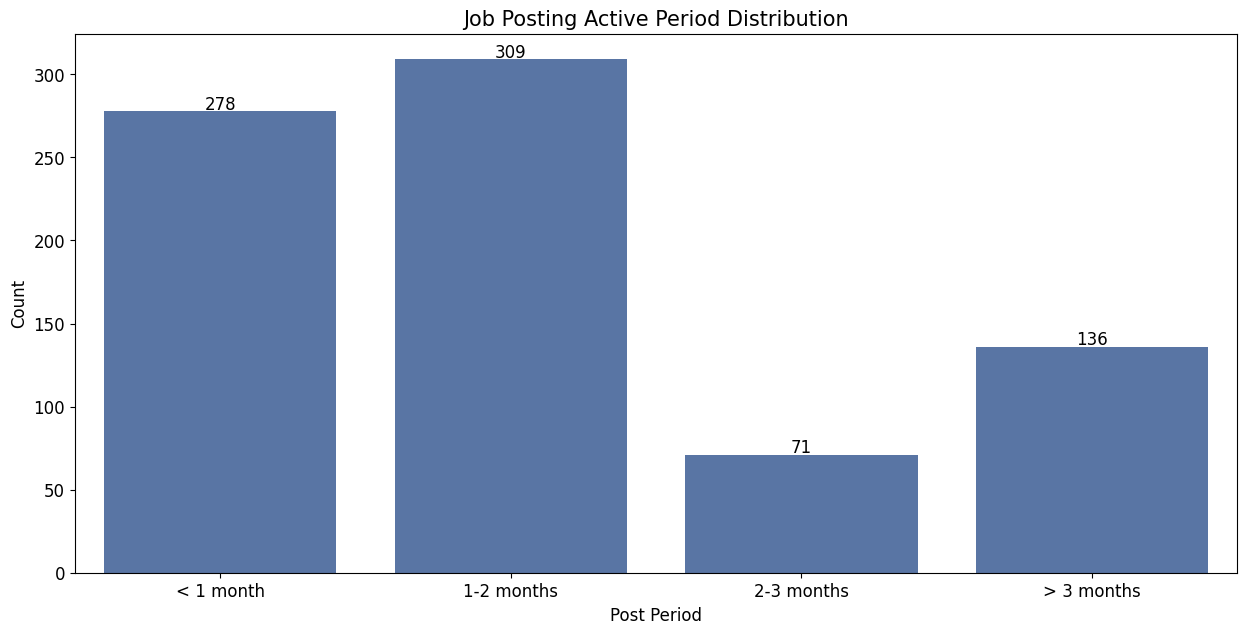

In [29]:
ordered_period = ['< 1 month', '1-2 months', '2-3 months', '> 3 months']
custom_barplot(dfg1, 'post_period', 'count', order=ordered_period, title='Job Posting Active Period Distribution', xlabel='Post Period', ylabel='Count')

We can conclude from the 1st dataframe that most of the companies that posting job often set their post under 2 months period

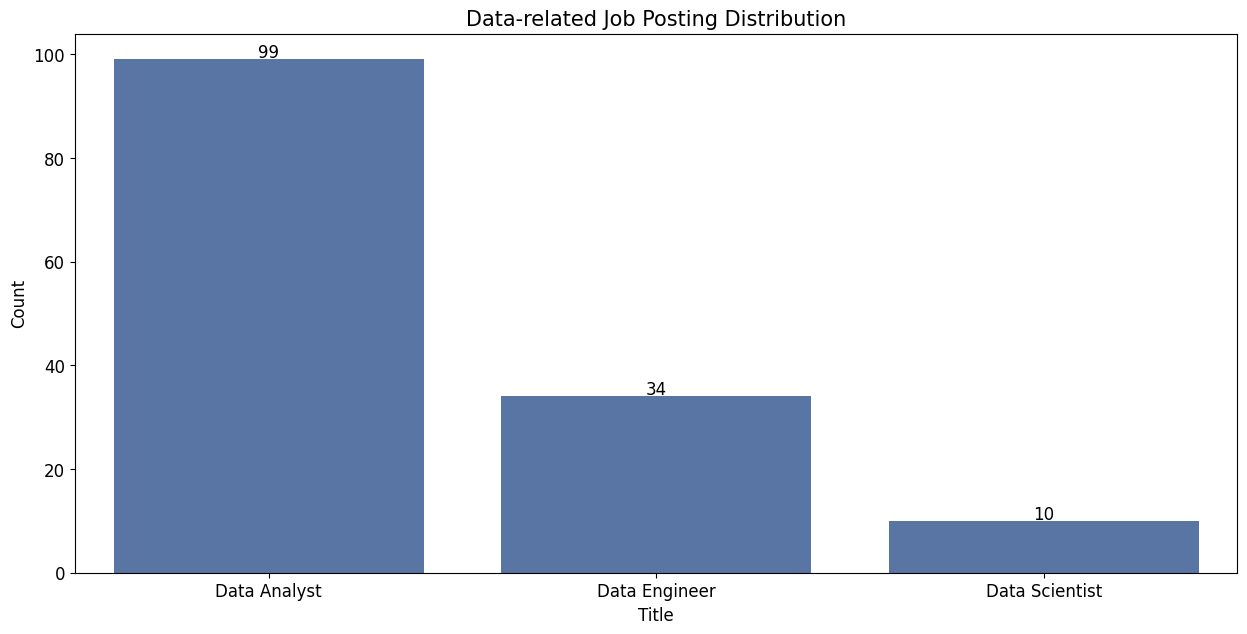

In [30]:
custom_barplot(dfg2, 'title', 'count', title='Data-related Job Posting Distribution', xlabel='Title', ylabel='Count')

In 2nd dataframe, most companies demand data analyst instead of both data engineer and data scientist combined 

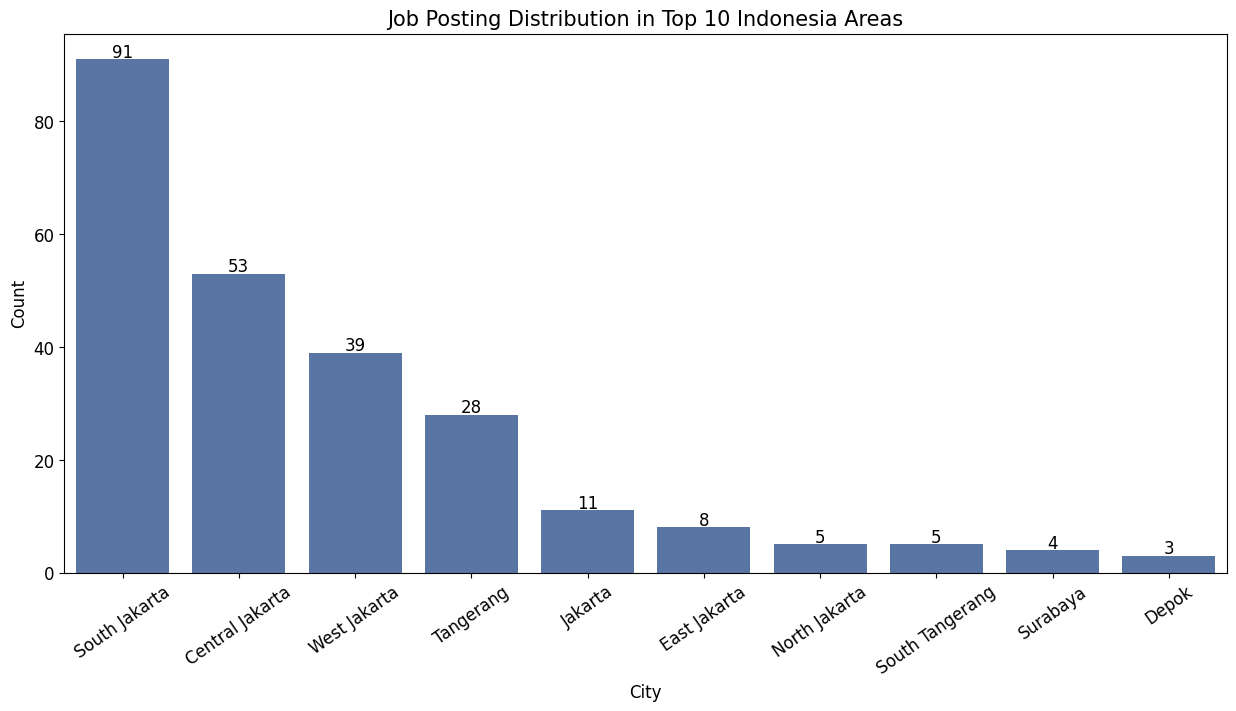

In [32]:
custom_barplot(dfg3.head(10), 'city', 'count', title='Job Posting Distribution in Top 10 Indonesia Areas', xlabel='City', ylabel='Count', xrotation=35)

We can see from the job posting distribution areas, Jakarta and Tangerang is either using Kalibrr site more than other cities or the demand of the data workers is higher than other areas.  

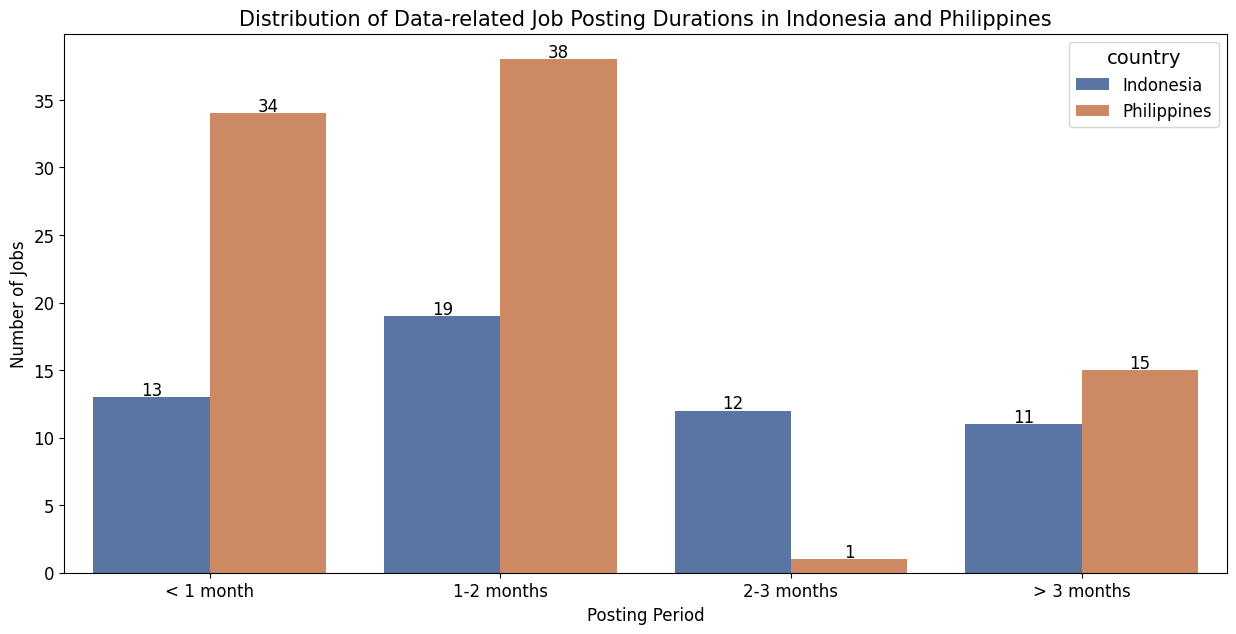

In [33]:
custom_barplot(dfg4, 'post_period', 'count', 'country', order=ordered_period, title='Distribution of Data-related Job Posting Durations in Indonesia and Philippines', xlabel='Posting Period', ylabel='Number of Jobs')

When we compared the data-related job postings duration between Indonesia and Philippines, both seems followed the same trends of concentrated a lot in the durations of fewer than 2 months durations and Philippines have more demand compared to Indonesia in data-related jobs 

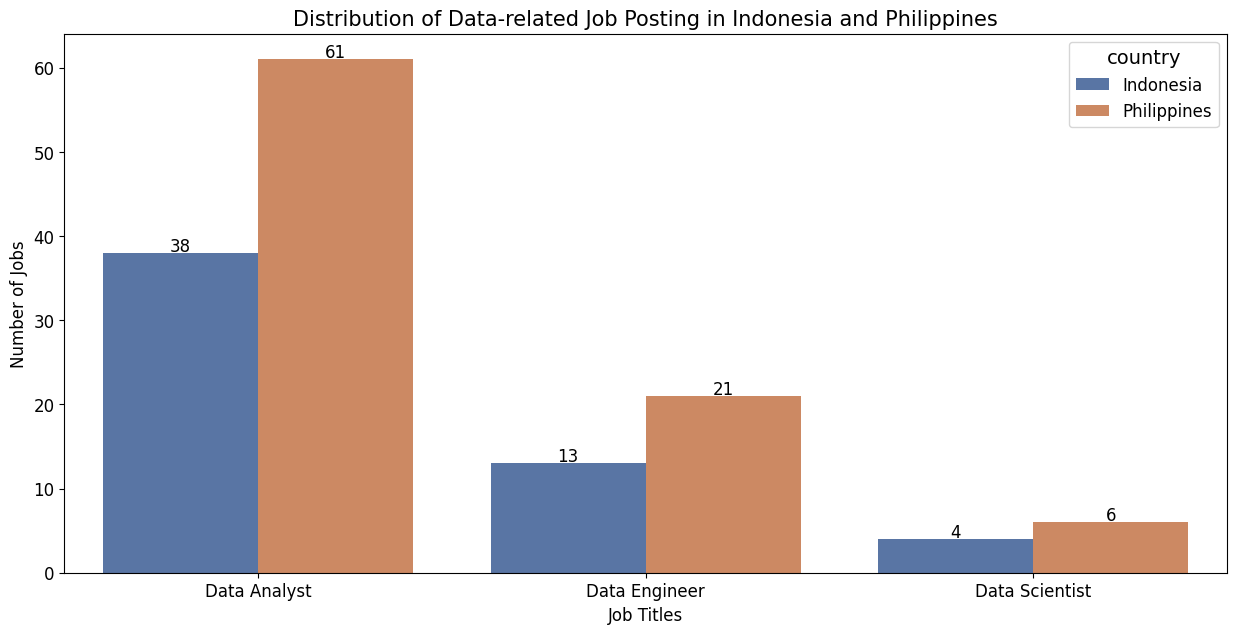

In [34]:
custom_barplot(dfg5, 'title', 'count', 'country', title='Distribution of Data-related Job Posting in Indonesia and Philippines', xlabel='Job Titles', ylabel='Number of Jobs')

In this last plot, the number of data analyst needed in Philippines are almost double the number of data analyst demand compared to Indonesia while both data scientist and data engineer are both almost similar in demand levels. 

<a id='conclusion'></a>
## Conclusion
After creating 5 plots from Kalibrr scraped data, we can copy all of the code and tweak some of it above into 'app.py' file and run it to see the plots on flask dashboard. from the process, We can some conclusions such as: 
- Philippines actually used Kalibrr and have higher demand than Indonesia in data-related jobs 
- Most companies posted their jobs in less than 2 months durations 
- Jakarta and Tangerang have the most demand for the jobs posted in Kalibrr than in other Indonesia areas 
- Data analyst are the most sought positions in Kalibrr compared to the other data-related jobs such as Data scientist or engineer 

### Reflection
There are actually many parts which I have difficulties in doing this project since I have expanded the scope of above the asked projects:
- Mistaking the demanded plot 
- Rewrite the entire 'style.css' and 'index.html' since the given files does not suited the given task 
- Debugging the flask aspect as well as integrating flask aspect for the code in 'app.py'
- Limited time constraints 
- The job titles might not represent the accurate information (example: having data analyst job description but does not have the title of data analyst)  

### Improvement
If given more time, I would like to expand more on the untouched aspects of the dataframe such as the company names and job descriptions. You can have additional analyses such as Industry segemntations or Top Hirers by implementing the same process of location recategorizing above into company names. As mentioned above, we might be able to have more accurate representations of data-related job distributions and have additional text-based analyses such as keyword or sentiment analysis. 

By extending the scraping into expired job postings or previous years, we might be able to have time-series analysais that can detect the trend or even more advanced analyses sucs as correlation with external factors such as economic or industries indicatores to see whether it has impacts on each other (causing economic growth or downturns) 

<a id='references'></a>
## References
- [Official Selenium Documentation](https://www.selenium.dev/documentation/) 
- [Selenium with Python](https://selenium-python.readthedocs.io/) 
- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors)
- [CSS Selectors Reference](https://www.w3schools.com/cssref/css_selectors.php)